# Downloading images from a IIIF manifest

## What is the *International Image Interoperability Framework* (IIIF) and why should we care?

"IIIF is a set of open standards for delivering high-quality, attributed digital objects online at scale.": https://iiif.io

For researchers, it provides a way to view and access image metadata and files that is consistent across institutions. Adoption of this standard by cultural institutions facilitates the creation of image repositories that cut across multiple collections.

If you are ever looking to create a curated collection of images for your research, then you should try to identify image sources that use the IIIF standard.

## What image repository are we working with?

In this notebook we will be working with images made available through Biblissima. "Biblissima+ is a multi-site digital infrastructure for research and service dedicated to the history of the transmission of ancient texts, from Antiquity to the Renaissance, in the West and in the East.": https://biblissima.fr

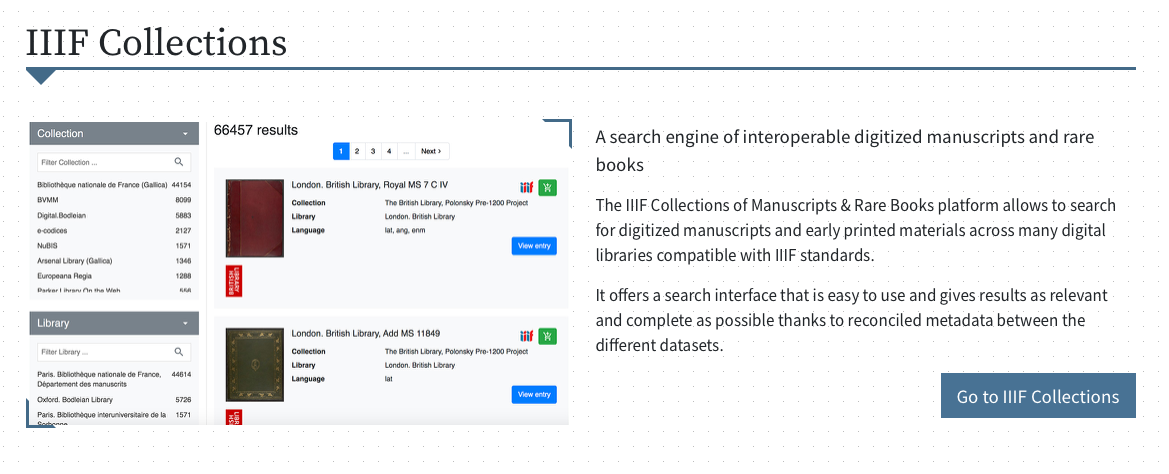

## What python tools do we need to import?

For this short exercise we use just two Python packages:

1. *requests* will allow us to talk to the Biblissima website and request data
2. *urllib* provides us with a simple way to download images once we have a direct URL to the JPEG files.

In [3]:
import requests
from urllib.request import urlretrieve

## Where is the data?

In [4]:
BOOK_URL = "https://iiif.biblissima.fr/collections/manifest/4f7c1e3bd453d9d2d5004fc4183645b7013ae5fd?tify={%22panX%22:0.582,%22panY%22:0.298,%22view%22:%22info%22,%22zoom%22:0.797}"

In [5]:
MANIFEST_URL = "https://nubis.univ-paris1.fr/iiif/2/1t5f/manifest"

## How do we fetch some JSON that describes the images we want?

We can use the URL defined above to request JSON data that describes the collection and the images it contains. In IIIF terminology, this is called a **manifest**. While not necessary for our purposes, you can read about manifests and other IIIF concepts here: https://iiif.io/get-started/how-iiif-works/

In [6]:
manifest_data = requests.get(MANIFEST_URL).json()

After fetching this manifest, we can print it out. This may seem like a lot of information, but we will be focussing on small pieces:

In [7]:
manifest_data

{'@context': 'http://iiif.io/api/presentation/2/context.json',
 '@id': 'https://nubis.univ-paris1.fr/iiif/ark:/15733/1t5f/manifest',
 '@type': 'sc:Manifest',
 'label': "Promesse autographe signée de Descartes, par laquelle il s'engage envers son frère Pierre Descartes, conseiller du Roi au parlement de Bretagne, à ne point vendre sans son consentement certains biens qu'il énumère",
 'description': 'Promesse datée du 3 avril 1622.',
 'thumbnail': {'@id': 'https://nubis.univ-paris1.fr/files/medium/ark_15733_14gq/ark_15733_1t5f/BIS_00_00452_P000_0001.jpg',
  '@type': 'dctypes:Image',
  'format': 'image/jpeg',
  'width': 200,
  'height': 140},
 'license': 'Licence Ouverte Etalab',
 'attribution': 'Fourni par la Bibliothèque de la Sorbonne',
 'logo': {'@id': 'https://nubis.univ-paris1.fr/files/asset/129dbdebc6e6821578336ab472cfc36a8d821f4d.jpg'},
 'related': {'@id': 'https://nubis.univ-paris1.fr/ark:/15733/1t5f',
  'format': 'text/html'},
 'seeAlso': {'@id': 'https://nubis.univ-paris1.fr/ap

## How do we extract key information from this JSON?

JSON is a nested, hierarchical structure. If you are not familiar with it you can read more about it here: https://en.wikipedia.org/wiki/JSON

We can inspect the top-level structure of our manifest by looking at its *keys*:

In [8]:
manifest_data.keys()

dict_keys(['@context', '@id', '@type', 'label', 'description', 'thumbnail', 'license', 'attribution', 'logo', 'related', 'seeAlso', 'metadata', 'sequences'])

For now, we are interested in the images *canvases* contained inside one or more *sequences*. We can get just the *canvases* with the following:

In [9]:
canvases = manifest_data["sequences"][0]["canvases"]

If we look carefully at the below canvas, we can see links to two JPEG images, both a thumbnail and higher-resolution image:

In [10]:
canvases[0]

{'@id': 'https://nubis.univ-paris1.fr/iiif/ark:/15733/1t5f/canvas/p1',
 '@type': 'sc:Canvas',
 'label': '1',
 'thumbnail': {'@id': 'https://nubis.univ-paris1.fr/files/medium/ark_15733_14gq/ark_15733_1t5f/BIS_00_00452_P000_0001.jpg',
  '@type': 'dctypes:Image',
  'format': 'image/jpeg',
  'width': 200,
  'height': 140},
 'width': 5312,
 'height': 3728,
 'images': [{'@id': 'https://nubis.univ-paris1.fr/iiif/ark:/15733/1t5f/annotation/p0001-image',
   '@type': 'oa:Annotation',
   'motivation': 'sc:painting',
   'resource': {'@id': 'https://nubis.univ-paris1.fr/iiif/532862/full/800,561/0/default.jpg',
    '@type': 'dctypes:Image',
    'format': 'image/jpeg',
    'width': 5312,
    'height': 3728,
    'service': {'@context': 'http://iiif.io/api/image/2/context.json',
     '@id': 'https://nubis.univ-paris1.fr/iiif/532862',
     'profile': 'http://iiif.io/api/image/2/level2.json',
     'tiles': [{'width': 256, 'scaleFactors': [1, 2, 4, 8, 16, 32]}],
     'width': 5312,
     'height': 3728}},


For now, let's start with the thumbnails, since they are slightly less nested in the data structure above:

In [11]:
canvases[0]["thumbnail"]

{'@id': 'https://nubis.univ-paris1.fr/files/medium/ark_15733_14gq/ark_15733_1t5f/BIS_00_00452_P000_0001.jpg',
 '@type': 'dctypes:Image',
 'format': 'image/jpeg',
 'width': 200,
 'height': 140}

Within each thumbnail there is an *id* that points to the JPEG file:

In [12]:
canvases[0]["thumbnail"]["@id"]

'https://nubis.univ-paris1.fr/files/medium/ark_15733_14gq/ark_15733_1t5f/BIS_00_00452_P000_0001.jpg'

Let's create a list of these thumbnails with a simple loop:

In [13]:
all_thumbnails = []

for canvas in canvases:
    all_thumbnails.append(canvas["thumbnail"]["@id"])

In [14]:
all_thumbnails

['https://nubis.univ-paris1.fr/files/medium/ark_15733_14gq/ark_15733_1t5f/BIS_00_00452_P000_0001.jpg',
 'https://nubis.univ-paris1.fr/files/medium/ark_15733_14gq/ark_15733_1t5f/BIS_00_00452_P000_0002.jpg',
 'https://nubis.univ-paris1.fr/files/medium/ark_15733_14gq/ark_15733_1t5f/BIS_00_00452_P001_0001.jpg',
 'https://nubis.univ-paris1.fr/files/medium/ark_15733_14gq/ark_15733_1t5f/BIS_00_00452_P001_0002.jpg']

## Downloading the images:

We can now use the `urlretrieve` function that we imported at the top of this notebook to download the images. We pass it both the URL to the thumbnail and a filename to use for the downloaded image:

In [15]:
for t in all_thumbnails:
    filename = t.split("/")[-1]
    urlretrieve(t, filename)

# Question

- Are you able to extract one or more of the larger images? What additional challenges are there?
- What other metadata appears in the manifest JSON that could be useful?

